# 機械学習コンペで人気のLightGBMをPythonで使ってみた

https://watlab-blog.com/2020/04/12/light-gbm/

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.127600
[LightGBM] [Info] Start training from score -1.188224
[LightGBM] [Info] Start training from score -0.990399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 2 and depth = 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
[LightGBM] [Warning] N

/Users/keetane/opt/anaconda3/envs/code/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


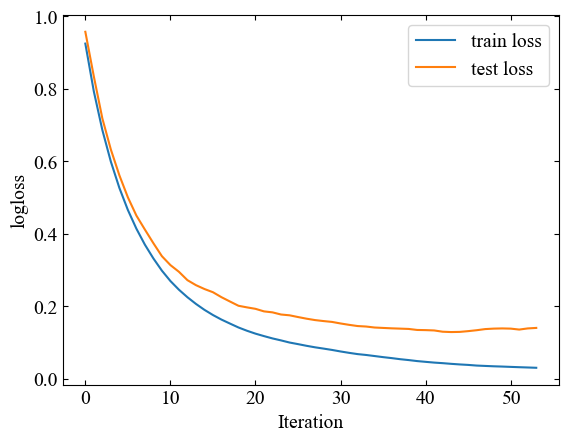

In [187]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

# データを用意する
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:, [0, 1, 2, 3]]) 
Y = pd.Series(iris.target)

# データをホールドアウト法で分割
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y,
    test_size=0.3,
    shuffle=True,
    random_state=0
)

# データセットを登録
lgb_train = lgb.Dataset(train_X, label=train_Y)
lgb_test = lgb.Dataset(test_X, label=test_Y, reference=lgb_train)

# LightGBMのハイパーパラメータを設定
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'num_iteration': 100,
    'force_row_wise': True
}

# Early stopping のコールバックを設定
callbacks = [lgb.early_stopping(stopping_rounds=10)]

# 学習の履歴を保存するための変数
evals_result = {}

# Early stopping のコールバックを設定 
callbacks = [lgb.early_stopping(stopping_rounds=10), lgb.record_evaluation(evals_result)]

# LightGBMのモデルを訓練する
model = lgb.train(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['Train', 'Test'],
    num_boost_round=100,
    callbacks=callbacks,
    # evals_result=evals_result
)

# 訓練誤差と汎化誤差
loss_train = evals_result['Train']['multi_logloss']
loss_test = evals_result['Test']['multi_logloss']

# 最良の予測器が得られたイテレーション数
best_iteration = model.best_iteration
print(best_iteration)

# グラフ描画
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('logloss')

ax1.plot(loss_train, label='train loss')
ax1.plot(loss_test, label='test loss')

plt.legend()
plt.show()
plt.close()


https://watlab-blog.com/2020/04/12/light-gbm/

In [188]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
# データを用意する
iris = datasets.load_iris()                   # scikit-learnのdatasetsを読み込む
X = pd.DataFrame(iris.data[:, [0, 1, 2, 3]])  # 訓練データ
Y = pd.Series(iris.target)                    # 教師データ

In [189]:
# データをホールドアウト法で分割
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,                # 訓練データとテストデータに分割する
                                                    test_size=0.3,       # テストデータの割合
                                                    shuffle=True,        # シャッフルする
                                                    random_state=0)      # 乱数シードを固定する

In [190]:
# データセットを登録
lgb_train = lgb.Dataset(train_X, train_Y)
lgb_test = lgb.Dataset(test_X, test_Y, reference=lgb_train)

In [191]:
# LightGBMのハイパーパラメータを設定
params = {'task': 'train',              # タスクを訓練に設定
          'boosting_type': 'gbdt',      # GBDTを指定
          'objective': 'multiclass',    # 多クラス分類を指定
          'metric': {'multi_logloss'},  # 多クラス分類の損失（誤差）
          'num_class': 3,               # クラスの数（irisデータセットが3個のクラスなので）
          'learning_rate': 0.1,         # 学習率
          'num_leaves': 21,             # ノードの数
          'min_data_in_leaf': 3,        # 決定木ノードの最小データ数
          'num_iteration': 100}         # 予測器(決定木)の数:イタレーション

In [192]:
lgb_results

NameError: name 'lgb_results' is not defined

In [ ]:
lgb_results = {}                                    # 学習の履歴を入れる入物
model = lgb.train(params=params,                    # ハイパーパラメータをセット
                  train_set=lgb_train,              # 訓練データを訓練用にセット
                  valid_sets=[lgb_train, lgb_test], # 訓練データとテストデータをセット
                  valid_names=['Train', 'Test'],    # データセットの名前をそれぞれ設定
                  num_boost_round=100,              # 計算回数
                #   early_stopping_rounds=10,         # アーリーストッピング設定
                #   evals_result=lgb_results
                  )         # 履歴を保存する


loss_train = lgb_results['Train']['multi_logloss']  # 訓練誤差
loss_test = lgb_results['Test']['multi_logloss']    # 汎化誤差
best_iteration = model.best_iteration               # 最良の予測器が得られたイタレーション数
print(best_iteration)
 
 
# ここからグラフ描画----------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
 
# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
# グラフの上下左右に目盛線を付ける。
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
 
# 軸のラベルを設定する。
ax1.set_xlabel('Iteration')
ax1.set_ylabel('logloss')
 
# データプロットする。
ax1.plot(loss_train, label='train loss')
ax1.plot(loss_test, label='test loss')
 
# グラフを表示する。
plt.legend()
plt.show()
plt.close()


/Users/keetane/opt/anaconda3/envs/code/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000005 seconds, init for row-wise cost 0.000656 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.127600
[LightGBM] [Info] Start training from score -1.188224
[LightGBM] [Info] Start training from score -0.990399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Train

KeyError: 'Train'

KeyError: 'Train'

# LightGBM 徹底入門 – LightGBMの使い方や仕組み、XGBoostとの違いについて

https://www.codexa.net/lightgbm-beginner/

データはkaggleから
https://www.kaggle.com/datasets/anokas/kuzushiji

ライブラリのimport

In [ ]:
# データ処理ラブラり
import numpy as np
import pandas as pd
# データ可視化ライブラリ
import matplotlib.pyplot as plt
# %matplotlib inline 
# LightGBM
import lightgbm as lgb
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


データセットの読み込み

In [2]:
classes = pd.read_csv('./kmnist/kmnist_classmap.csv')
print(classes.shape)
classes


(10, 3)


index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を

imgのデータはnumpyの圧縮形式になっている

In [3]:
np.load('./kmnist/kmnist-train-imgs.npz')

NpzFile './kmnist/kmnist-train-imgs.npz' with keys: arr_0

In [4]:
# 訓練データの読み込み
X_train = np.load('./kmnist/kmnist-train-imgs.npz')['arr_0']
y_train = np.load('./kmnist/kmnist-train-labels.npz')['arr_0']
 
# テストデータの読み込み
X_test = np.load('./kmnist/kmnist-test-imgs.npz')['arr_0']
y_test = np.load('./kmnist/kmnist-test-labels.npz')['arr_0'] 

# データのサイズ確認
print(X_train.shape)
print(X_test.shape)

print(y_train[0:5])
print(classes)


(60000, 28, 28)
(10000, 28, 28)
[8 7 0 1 4]
   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


y_trainの整数はclassesのindexカラムと連動しています。ターゲットクラス8は平仮名の「れ」を意味します。後ほど参照しやすいようにclassesをディクショナリに変換しましょう。


In [5]:
labelindex = classes.set_index('index').to_dict()['char']
labelindex


{0: 'お',
 1: 'き',
 2: 'す',
 3: 'つ',
 4: 'な',
 5: 'は',
 6: 'ま',
 7: 'や',
 8: 'れ',
 9: 'を'}

試しにKMNISTの画像データを表示してみます。X_trainには画像のピクセル値が格納されています。KMINSTは28 x 28のグレースケールの画像です。各ピクセルの値は最小値0〜最大値255です。確認のためX_trainの最小値と最大値を算出してみましょう。

In [6]:
print(X_train.min())
print(X_train.max())


0
255


matplotlibでピクセル値の数列を画像に変換

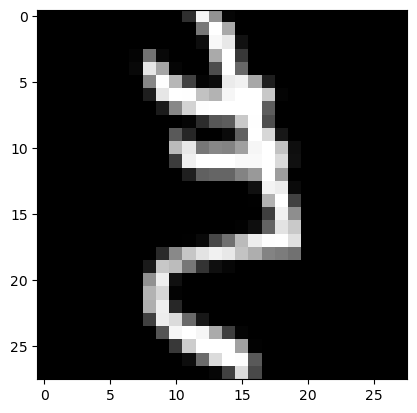

1
き


In [7]:
plt.imshow(X_train[423], cmap=plt.cm.gray)
plt.show()
print(y_train[423])
print(labelindex[1])


## データ前処理 

どんなデータになっているのか確認

[[  0   0 133  91   7]
 [  0   0 128 128  20]
 [  0   0  95 224  20]
 [  0   0 112 159  64]
 [  0   1 211 234 253]]


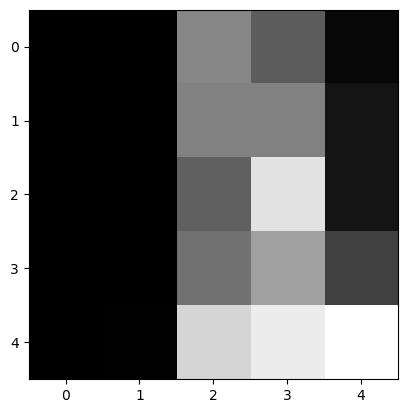

In [8]:
print(X_train[0,10:15,10:15])
plt.imshow(X_train[0,10:15,10:15], cmap = plt.cm.gray)
plt.show()

最大値の255で割ることでnormalizeし、0-1のレンジに変換

In [9]:
# 訓練/テストデータの正規化
X_train = X_train / 255 
X_test = X_test/ 255

[[0.         0.         0.52156863 0.35686275 0.02745098]
 [0.         0.         0.50196078 0.50196078 0.07843137]
 [0.         0.         0.37254902 0.87843137 0.07843137]
 [0.         0.         0.43921569 0.62352941 0.25098039]
 [0.         0.00392157 0.82745098 0.91764706 0.99215686]]


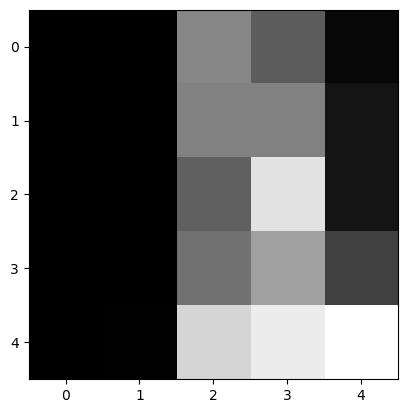

In [10]:
print(X_train[0,10:15,10:15])
plt.imshow(X_train[0,10:15,10:15], cmap = plt.cm.gray)
plt.show()

続いてLightGBMでモデル訓練を行うため、訓練・テストデータのサイズを変更します。現在は(レコード数, 縦, 横)の形です。28 x 28 = 784ですので、(レコード数, 784)へ変更します。

In [11]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [12]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_train.shape)
print(X_test.shape)



(60000, 784)
(10000, 784)


In [13]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.03921569 0.02745098 0.91372549 0.3372549
 0.         0.         0.1254902  0.38823529 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21176471 1.         0.32941176 0.         0.
 0.02745098 0.59215686 0.0745098  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.59607843
 0.98431373 0.05490196 0.         0.         0.09803922 0.60784314
 0.38431373 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.50588235 0.97254902 0.7372549  0.
 0.         0.         0.31372549

##### ハイパーパラメータ


In [ ]:
lgb.LGBMClassifier()

# ブラウザのjupyterじゃないと表示されない
'''
LGBMClassifier(
    boosting_type='gbdt', 
    class_weight=None, 
    colsample_bytree=1.0,
    importance_type='split', 
    learning_rate=0.1, 
    max_depth=-1,
    min_child_samples=20, 
    min_child_weight=0.001, 
    min_split_gain=0.0,
    n_estimators=100, 
    n_jobs=-1, 
    num_leaves=31, 
    objective=None,
    random_state=None, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    silent=True,
    subsample=1.0, 
    subsample_for_bin=200000, 
    subsample_freq=0
    )
'''

LGBMClassifier()

# LightGBMモデル訓練

In [15]:
# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)


In [16]:
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'multiclass',
'num_class': 10,
'verbose': 5,
}


In [17]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    # verbose_eval=5
    )

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.782756
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.671165
[LightGBM] [Debug] init for col-wise cost 0.083936 seconds, init for row-wise cost 0.190084 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 170893
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 784
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

# 予測

In [19]:
preds = gbm.predict(X_test)
print(preds[0])
y_pred = []
for x in preds:
    y_pred.append(np.argmax(x))
print('number of y_pred is ' + str(len(y_pred)))
print(y_pred[0:5])
confusion_matrix(y_test, y_pred)

[1.39718938e-04 5.51595529e-03 9.67645583e-01 2.41531244e-04
 3.60542460e-03 1.18938347e-02 5.29109666e-03 4.14806148e-04
 4.05319520e-03 1.19885421e-03]
number of y_pred is 10000
[2, 1, 3, 1, 3]


array([[900,   2,   4,   4,  28,   8,   5,  28,  19,   2],
       [  1, 869,  26,   2,  16,   6,  41,   7,  15,  17],
       [ 10,  15, 852,  48,  12,   5,  23,  11,  14,  10],
       [  2,   9,  30, 936,   6,   3,   6,   3,   1,   4],
       [ 25,  15,  24,   9, 863,   6,  26,   8,  14,  10],
       [  6,  20,  77,   6,  14, 835,  30,   2,   6,   4],
       [  2,   9,  37,   5,  15,   6, 916,   6,   2,   2],
       [  8,   8,  16,   3,  49,   1,  35, 830,  33,  17],
       [  3,  25,  10,  26,   0,   6,  15,   3, 907,   5],
       [  6,  21,  21,   6,  35,   0,   8,  17,  17, 869]])

In [20]:
np.sum(confusion_matrix(y_test, y_pred))
# confusion matrixの総和はy_predの総和に等しい。
# つまり、どの文字をどの文字として予測したかに対応した行列になっている。
# 0を0と予測できた数は900, 0を1と予測した数が2(反対かも)のような行列

10000

正解率

In [21]:
accuracy_score(y_test, y_pred)

0.8777

各サンプルの答え確認

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [23]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03921569, 0.02745098,
       0.91372549, 0.3372549 , 0.        , 0.        , 0.1254902 ,
       0.38823529, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21176471, 1.        , 0.32941176,
       0.        , 0.        , 0.02745098, 0.59215686, 0.0745098 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.59607843, 0.98431373, 0.05490196, 0.        , 0.        ,
       0.09803922, 0.60784314, 0.38431373, 0.        , 0.     

3
正解の文字は "つ"
3
予測した文字は "つ"


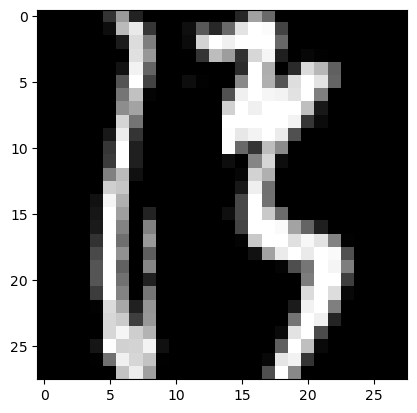

In [25]:
n_y_test = 12
print(y_test[n_y_test])
print('正解の文字は "'+labelindex[y_test[n_y_test]]+'"')
print(y_pred[n_y_test])
print('予測した文字は "'+labelindex[y_pred[n_y_test]]+'"')
plt.imshow(X_test[n_y_test].reshape(28,28), cmap=plt.cm.gray)
plt.show()


予測確認

In [26]:
# 1,-1でreshapeすると、x=yの形でreshapeされる
X_test[0].reshape(1,-1)
X_test[0].reshape(28,28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38431373, 0.18039216, 0.01960784, 0.37647059,
        0.52156863, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.58823529, 0.80392157, 0.8627451 , 1.        ,
        0.98431373, 0.45882353, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.29803922, 0.86666667, 0.95686275, 1.        ,
        0.95294118, 0.2666

In [29]:
test = 4
# 試しにtraining dataを代入してみると、10個のarray dataが出力された。
# これは、各文字列についての確率を予測した結果。つまり、もっとも確率の高いindexが予測結果となる。

# array dataの総和を計算
print(np.sum(gbm.predict(X_test[test].reshape(1,-1))))

# 予測結果のarray dataを出力
gbm.predict(X_test[test].reshape(1,-1))

0.9999999999999999


array([[2.14329754e-05, 3.76516415e-06, 5.25421892e-06, 9.99209975e-01,
        2.10261267e-05, 6.50686719e-04, 1.82737725e-05, 4.15189853e-05,
        5.09634370e-06, 2.29702058e-05]])

In [30]:
test = 1
gbm.predict(X_test[test].reshape(1,-1))
print(np.argmax(gbm.predict(X_test[test].reshape(1,-1))))
print('正解の文字は "'+labelindex[y_test[n_y_test]]+'"')
print('予測の文字は "'+labelindex[y_test[n_y_test]]+'"')


1
正解の文字は "つ"
予測の文字は "つ"


# BCL2のデータを予測してみる

https://www.ebi.ac.uk/chembl/explore/assays/STATE_ID:E0Iql66eksTYQjnqWPUTDQ%3D%3D


## データの前処理

### データのロード

In [1]:
import pandas as pd
df = pd.read_csv('./chembl/bcl2.csv', sep=';')
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [2]:
# Smilesのカラムにnullがないかを確認
df.loc[df['Smiles'].isnull(), :]

Empty DataFrame
Columns: [Molecule ChEMBL ID, Molecule Name, Molecule Max Phase, Molecular Weight, #RO5 Violations, AlogP, Compound Key, Smiles, Standard Type, Standard Relation, Standard Value, Standard Units, pChEMBL Value, Data Validity Comment, Comment, Uo Units, Ligand Efficiency BEI, Ligand Efficiency LE, Ligand Efficiency LLE, Ligand Efficiency SEI, Potential Duplicate, Assay ChEMBL ID, Assay Description, Assay Type, BAO Format ID, BAO Label, Assay Organism, Assay Tissue ChEMBL ID, Assay Tissue Name, Assay Cell Type, Assay Subcellular Fraction, Assay Parameters, Assay Variant Accession, Assay Variant Mutation, Target ChEMBL ID, Target Name, Target Organism, Target Type, Document ChEMBL ID, Source ID, Source Description, Document Journal, Document Year, Cell ChEMBL ID, Properties, Action Type, Standard Text Value]
Index: []

[0 rows x 47 columns]

In [3]:
# IC50のカラムにnullがないかを確認
df.loc[df['Standard Value'].isnull(), :]

Empty DataFrame
Columns: [Molecule ChEMBL ID, Molecule Name, Molecule Max Phase, Molecular Weight, #RO5 Violations, AlogP, Compound Key, Smiles, Standard Type, Standard Relation, Standard Value, Standard Units, pChEMBL Value, Data Validity Comment, Comment, Uo Units, Ligand Efficiency BEI, Ligand Efficiency LE, Ligand Efficiency LLE, Ligand Efficiency SEI, Potential Duplicate, Assay ChEMBL ID, Assay Description, Assay Type, BAO Format ID, BAO Label, Assay Organism, Assay Tissue ChEMBL ID, Assay Tissue Name, Assay Cell Type, Assay Subcellular Fraction, Assay Parameters, Assay Variant Accession, Assay Variant Mutation, Target ChEMBL ID, Target Name, Target Organism, Target Type, Document ChEMBL ID, Source ID, Source Description, Document Journal, Document Year, Cell ChEMBL ID, Properties, Action Type, Standard Text Value]
Index: []

[0 rows x 47 columns]

In [4]:
# SmilesとIC50値, pChEMBL Value, Molecule Max Phaseの表を作成
extracted_cols = ['Smiles', 'Standard Value', 'pChEMBL Value', 'Molecule Max Phase']
df_mols = df[extracted_cols].rename(columns={"Standard Value": "IC50", 'Molecule Max Phase': 'Phase'})  # IC50値の入った列名を変更
df_mols['Phase'] = df_mols['Phase'].fillna('0.')   # 臨床入りしていない化合物のstatusを0.に変更
df_mols.head()

Smiles     IC50  pChEMBL Value  \
0                CC(C)c1cc(C(=O)c2ccccc2)c(O)c(O)c1O  41600.0           4.38   
1   Nc1nc(-c2ccccc2)nc2c1[n+]([O-])c1ccccc1[n+]2[O-]   1600.0           5.80   
2      CC(C)C(C(=O)O)N1C(=O)/C(=C/c2ccc(Br)cc2)SC1=S   2400.0           5.62   
3  O=C(O)[C@H](Cc1ccccc1)N1C(=O)/C(=C/c2ccc(OCCOC...  21200.0           4.67   
4  CCCCN(CCCC)C(=O)c1nn(-c2ccc(C(=O)NS(=O)(=O)c3c...    340.0           6.47   

  Phase  
0    0.  
1    0.  
2    0.  
3    0.  
4    0.

In [5]:
df_mols.describe().round(2)  # IC50値の要約統計量を表示

IC50  pChEMBL Value
count    2651.00        2651.00
mean     1635.77           7.70
std      6683.68           1.74
min         0.01           4.00
25%         0.67           6.23
50%        25.00           7.60
75%       583.84           9.17
max    100000.00          11.00

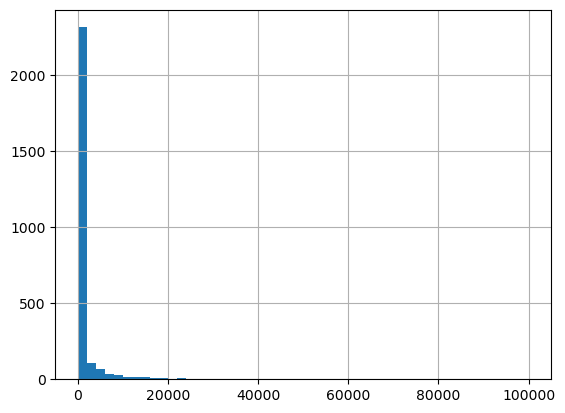

In [6]:
import matplotlib.pyplot as plt
df_mols["IC50"].hist(bins=50)  # IC50値のヒストグラムを確認 (値を50個の階級に分割)
plt.show()

In [7]:
from math import log10  # Pythonの標準ライブラリの math から log10 関数をインポート

df_mols["pIC50"] = df_mols["IC50"].map(lambda x: - log10(x) + 9)  # "IC50" の列から "pIC50" の列を作成
df_mols.head()

Smiles     IC50  pChEMBL Value  \
0                CC(C)c1cc(C(=O)c2ccccc2)c(O)c(O)c1O  41600.0           4.38   
1   Nc1nc(-c2ccccc2)nc2c1[n+]([O-])c1ccccc1[n+]2[O-]   1600.0           5.80   
2      CC(C)C(C(=O)O)N1C(=O)/C(=C/c2ccc(Br)cc2)SC1=S   2400.0           5.62   
3  O=C(O)[C@H](Cc1ccccc1)N1C(=O)/C(=C/c2ccc(OCCOC...  21200.0           4.67   
4  CCCCN(CCCC)C(=O)c1nn(-c2ccc(C(=O)NS(=O)(=O)c3c...    340.0           6.47   

  Phase     pIC50  
0    0.  4.380907  
1    0.  5.795880  
2    0.  5.619789  
3    0.  4.673664  
4    0.  6.468521

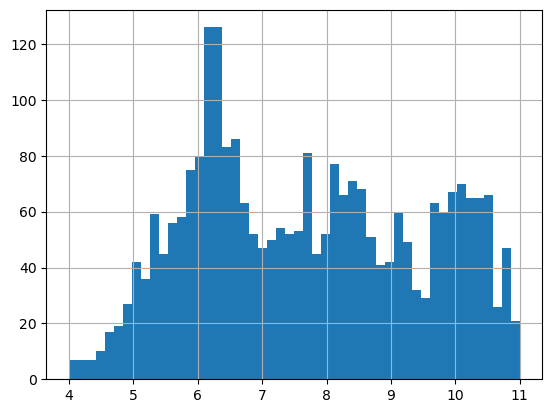

In [8]:
df_mols["pIC50"].hist(bins=50)
plt.show()

In [9]:
df_mols = df_mols.drop(["IC50", 'pChEMBL Value', 'Phase'], axis=1)  # "IC50" の列 (axis=1) を除去
df_mols.head()

Smiles     pIC50
0                CC(C)c1cc(C(=O)c2ccccc2)c(O)c(O)c1O  4.380907
1   Nc1nc(-c2ccccc2)nc2c1[n+]([O-])c1ccccc1[n+]2[O-]  5.795880
2      CC(C)C(C(=O)O)N1C(=O)/C(=C/c2ccc(Br)cc2)SC1=S  5.619789
3  O=C(O)[C@H](Cc1ccccc1)N1C(=O)/C(=C/c2ccc(OCCOC...  4.673664
4  CCCCN(CCCC)C(=O)c1nn(-c2ccc(C(=O)NS(=O)(=O)c3c...  6.468521

In [10]:
df_mols.describe().round(2)  # IC50値の要約統計量を表示

pIC50
count  2651.00
mean      7.70
std       1.74
min       4.00
25%       6.23
50%       7.60
75%       9.17
max      11.00

### SMILES文字列・分子構造標準化

In [11]:
from rdkit import Chem  # RDKit から `Chem` というモジュールをインポートする
from rdkit import RDLogger
from rdkit.Chem.MolStandardize import rdMolStandardize

log = RDLogger.logger()
log.setLevel(RDLogger.CRITICAL)  # RDKitでの操作の際に Warning を表示しないようにする

# 前処理用の関数を定義
def preprocess_smiles(smi):
    mol = Chem.MolFromSmiles(smi)  # SMILES文字列の読み込み
    mol = rdMolStandardize.FragmentParent(mol)  # 読み込んだ分子構造の前処理
    return Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)  # 立体化学の情報を保持し、正規化されたSMILES文字列を出力

In [12]:
df_mols["ModSmiles"] = df_mols["Smiles"].map(preprocess_smiles)  # preprocess_smiles 関数を df_mols の "Smiles" 列に適用
df_mols[df_mols["ModSmiles"] != df_mols["Smiles"]]  # SMILES文字列の修正前後で変更があったものを表示

Smiles     pIC50  \
54   Cl.N=C(N)c1ccc(/N=N/c2c(O)ccc3c2[nH]c2ccccc23)cc1  5.236572   
684       COc1ccc2c(c1)C(=O)C1C=C([N+]#N)C=CC1N2.[Cl-]  4.982967   

                                          ModSmiles  
54   N=C(N)c1ccc(/N=N/c2c(O)ccc3c2[nH]c2ccccc23)cc1  
684          COc1ccc2c(c1)C(=O)C1C=C([N+]#N)C=CC1N2

### 重複の確認

In [13]:
print(len(df_mols['ModSmiles'].unique()), '/', len(df_mols))    # ユニークなSMILES/dfに含まれるSMILES

1949 / 2651


In [14]:
df_mols[df_mols.duplicated(keep=False, subset="ModSmiles")]  # "ModSmiles" が別のエントリと重複しているエントリを抽出

Smiles     pIC50  \
16    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  6.145998   
17    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  6.193847   
18    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  6.565798   
19    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  6.501758   
27    Cc1cccc(-n2nc(C(=O)N(c3ccccc3)c3ccccc3)cc2C)c1...  6.408935   
...                                                 ...       ...   
2625  Cc1cc2c(C(C)C)c(O)c(O)c(C=O)c2c(O)c1-c1c(C)cc2...  6.376751   
2627  CCCCN(CCCC)C(=O)c1nn(-c2ccc(C(=O)NS(=O)(=O)c3c...  8.000000   
2635    O=[N+]([O-])c1ccccc1Nc1nnc(-c2c[nH]c3ccccc23)o1  5.369572   
2636  CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...  7.229148   
2650  CN(C)CC#Cc1ccc(OCCCc2sc(N3CCc4cccc(C(=O)Nc5nc6...  6.417937   

                                              ModSmiles  
16    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  
17    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  
18    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  
19    CCCCN(CCCC)C(=O)c1cc(C)n(-c2ccc(N[S+]([O-])c3c...  
27    Cc1cccc(-n2nc(C(=O)N(c3ccccc3)c3ccccc3)cc2C)c1...  
...                                                 ...  
2625  Cc1cc2c(C(C)C)c(O)c(O)c(C=O)c2c(O)c1-c1c(C)cc2...  
2627  CCCCN(CCCC)C(=O)c1nn(-c2ccc(C(=O)NS(=O)(=O)c3c...  
2635    O=[N+]([O-])c1ccccc1Nc1nnc(-c2c[nH]c3ccccc23)o1  
2636  CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...  
2650  CN(C)CC#Cc1ccc(OCCCc2sc(N3CCc4cccc(C(=O)Nc5nc6...  

[1290 rows x 3 columns]

In [15]:
# 平均値で重複を除去
df_mols = (df_mols.groupby("ModSmiles", as_index=False).mean(numeric_only=True)  # "ModSmiles" の内容で分けたグループについて値の平均をとる
                  .rename(columns={"ModSmiles": "Smiles"}))  # 列名の変更
df_mols

Smiles     pIC50
0          Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  4.931814
1     C#CCCOC(=O)Nc1ccc(C2=NN(C(=O)c3ccc(Br)cc3)C(c3...  7.187087
2     C#CCN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(...  5.886057
3     C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.343902
4     C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.936667
...                                                 ...       ...
1944  O=c1c(O)cccc2c([C@H]3Oc4cc(O)cc(O)c4C[C@H]3O)c...  6.543634
1945      O=c1c2cc(O)c(O)c(O)c2nc(-c2ccccc2)n1Cc1ccccc1  6.018181
1946  O=c1c2ccc(S(=O)(=O)c3ccc4c(=O)n5c6ccccc6nc5c5c...  4.853872
1947   O=c1cc(-c2cc(O)c(O)cc2Cc2ccccc2)oc2cc(O)cc(O)c12  5.337242
1948                   Oc1cc(Cc2ccccc2)c(Cc2ccccc2)cc1O  5.327902

[1949 rows x 2 columns]

In [16]:
df_mols.to_csv("./chembl/bcl2_prop.csv", index=False)  # 保存するファイル名を指定。indexは出力しないようにする。

## 予測モデルの訓練と評価

### データのロードと記述子計算

In [17]:
import pandas as pd
df = pd.read_csv('./chembl/bcl2_prop.csv')  # csvデータの読み込み
print('{} entries'.format(len(df))) # データセットないのエントリ数を表示
df.head()

1949 entries


Smiles     pIC50
0       Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  4.931814
1  C#CCCOC(=O)Nc1ccc(C2=NN(C(=O)c3ccc(Br)cc3)C(c3...  7.187087
2  C#CCN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(...  5.886057
3  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.343902
4  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.936667

In [18]:
from rdkit.Chem import PandasTools  # RDKit の PandasTools をインポート

# df に対し、"Smiles" 列に記載されたSMILES文字列から分子構造データを作成し、結果を "Mol" カラムに書き出す
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Smiles", molCol="Mol")
df.head()

Smiles     pIC50  \
0       Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  4.931814   
1  C#CCCOC(=O)Nc1ccc(C2=NN(C(=O)c3ccc(Br)cc3)C(c3...  7.187087   
2  C#CCN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(...  5.886057   
3  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.343902   
4  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.936667   

                                             Mol  
0  <rdkit.Chem.rdchem.Mol object at 0x12d28f5a0>  
1  <rdkit.Chem.rdchem.Mol object at 0x12fd98f20>  
2  <rdkit.Chem.rdchem.Mol object at 0x12fd98f90>  
3  <rdkit.Chem.rdchem.Mol object at 0x12fdc2420>  
4  <rdkit.Chem.rdchem.Mol object at 0x12fdc1e00>

In [19]:
# descriptorを計算してdfに追加
from rdkit.Chem import Descriptors

desc_names = sorted([d for d, _ in Descriptors.descList]) # 全記述子の名称のリストを取得 (順序を固定するため辞書順にソートしておく)
print(f"{len(desc_names)} descriptors")
print(desc_names)

from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

# desc_namesに含まれている記述子を計算するインスタンスを準備
calc = MolecularDescriptorCalculator(desc_names)

# calc の CalcDescriptorsメソッドを各分子に適用して記述子計算
descs = [calc.CalcDescriptors(m) for m in df["Mol"]]

df_desc = pd.DataFrame(descs, columns=desc_names)  # 計算結果をデータフレームにまとめる
df = pd.concat([df, df_desc], axis=1)  # df_desc を df に (右から) 結合
df.head()

210 descriptors
['AvgIpc', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAroma

Smiles     pIC50  \
0       Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  4.931814   
1  C#CCCOC(=O)Nc1ccc(C2=NN(C(=O)c3ccc(Br)cc3)C(c3...  7.187087   
2  C#CCN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(...  5.886057   
3  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.343902   
4  C#Cc1cc(S(=O)(=O)NC(=O)c2ccc(N3CCN(CC4=C(c5ccc...  8.936667   

                                             Mol    AvgIpc  BCUT2D_CHGHI  \
0  <rdkit.Chem.rdchem.Mol object at 0x12d28f5a0>  2.616458      2.135845   
1  <rdkit.Chem.rdchem.Mol object at 0x12fd98f20>  3.307014      2.331487   
2  <rdkit.Chem.rdchem.Mol object at 0x12fd98f90>  3.087118      2.482681   
3  <rdkit.Chem.rdchem.Mol object at 0x12fdc2420>  3.709282      2.303020   
4  <rdkit.Chem.rdchem.Mol object at 0x12fdc1e00>  3.722001      2.301623   

   BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  BCUT2D_MRLOW  \
0     -2.027567       2.196472       -2.315401     9.103187     -0.607519   
1     -2.217430       2.338602       -2.265765     9.103001      0.071085   
2     -2.242180       2.367886       -2.322699     7.989788     -0.043548   
3     -2.390943       2.434119       -2.468307     7.897012      0.048960   
4     -2.390923       2.433231       -2.468302     7.897011      0.048960   

   ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...             0           0                  0             0   
1  ...             0           0                  1             0   
2  ...             1           1                  1             0   
3  ...             1           0                  1             0   
4  ...             1           0                  1             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea       qed  
0            0            0             0                 0        0  0.307875  
1            0            0             0                 0        0  0.322256  
2            0            0             0                 0        0  0.062592  
3            0            0             0                 0        0  0.118429  
4            0            0             0                 0        0  0.118546  

[5 rows x 213 columns]

In [20]:
# 分子構造によっては計算が失敗するので、NaNやinfを除去
import numpy as np  # NumPy のインポート

n_nulls = (df.replace(np.inf, np.nan)  # inf を NaN に置換した DataFrame を作成
             .isnull()  # 各要素が np.nan であるか否かを判定した DataFrame を作成
             .sum())  # 各列に含まれる np.nan の個数を計算
null_cols = []
for col, val in zip(df.columns, n_nulls):
    if val > 0:  # NaN や inf が含まれている
        null_cols.append(col)
print(f"{len(null_cols)} descriptors have missing values.")
print(null_cols)  # NaN や inf が含まれている列名のリストを表示

0 descriptors have missing values.
[]


In [21]:
# 失敗した記述子確認
indices_with_null = df[null_cols].isnull().any(axis=1)  # 行方向 (axis=1) に一つでも True があるエントリのインデックスを取得
df.loc[indices_with_null, ["Smiles", "pIC50"]]

Empty DataFrame
Columns: [Smiles, pIC50]
Index: []

### データの分割と訓練

In [22]:
### データセットの分割
from sklearn.model_selection import train_test_split

# テストデータセットの比率を全体の2割に設定 (再現性を保証するため、乱数シードを固定している)
train_valid_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

print(f"#Training + Validation samples: {len(train_valid_df)}")
print(f"#Test samples: {len(test_df)}")

#Training + Validation samples: 1559
#Test samples: 390


In [36]:
import lightgbm as lgb
print(lgb.__version__)

# データの準備
train_data = lgb.Dataset(train_valid_df[desc_names], label=train_valid_df["pIC50"])
eval_data = lgb.Dataset(test_df[desc_names], label=test_df["pIC50"])

4.5.0


### ハイパーパラメータ設定と訓練

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22255
[LightGBM] [Info] Number of data points in the train set: 1559, number of used features: 177
[LightGBM] [Info] Start training from score 7.542923
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[89]	training's rmse: 0.349229	valid_0's rmse: 0.673186


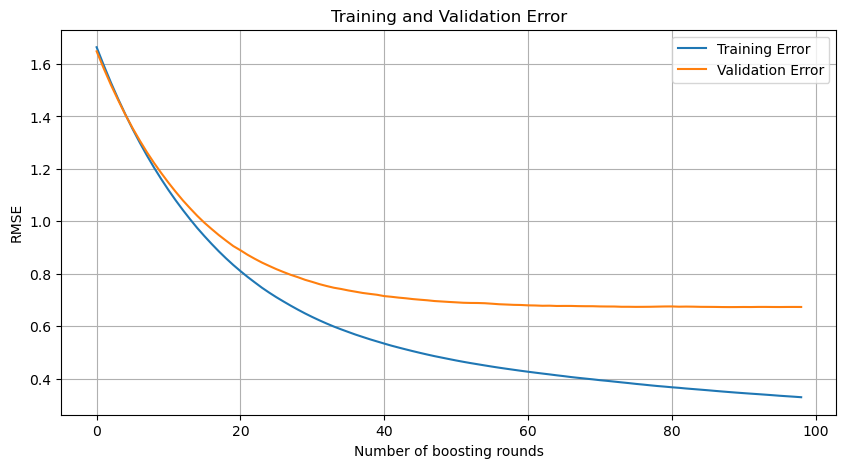

Best iteration: 89
Best score: defaultdict(<class 'collections.OrderedDict'>, {'training': OrderedDict({'rmse': 0.3492288145101005}), 'valid_0': OrderedDict({'rmse': 0.6731863402199001})})


In [49]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# パラメータ設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10,
    'verbose': 1
}

# 結果を記録するコールバック関数
evals_result = {}
def record_evaluation(evals_result):
    def callback(env):
        if env.iteration == 0:
            evals_result['training'] = []
            evals_result['valid_0'] = []
        if len(env.evaluation_result_list) == 2:
            evals_result['training'].append(env.evaluation_result_list[0][2])
            evals_result['valid_0'].append(env.evaluation_result_list[1][2])
    return callback

# モデルのトレーニング
gbm = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, eval_data],
    valid_names=['training', 'valid_0'],
    num_boost_round=1000,
    callbacks=[record_evaluation(evals_result)]
)

# 訓練誤差と汎化誤差のグラフ化
def plot_learning_curve(evals_result):
    plt.figure(figsize=(10, 5))
    plt.plot(evals_result['training'], label='Training Error')
    plt.plot(evals_result['valid_0'], label='Validation Error')
    plt.xlabel('Number of boosting rounds')
    plt.ylabel('RMSE')
    plt.title('Training and Validation Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(evals_result)

# Early stoppingの結果を表示
print(f"Best iteration: {gbm.best_iteration}")
print(f"Best score: {gbm.best_score}")


### 予測

In [45]:
# テストデータセットの出力
predictions = gbm.predict(
    test_df[desc_names], 
    num_iteration=gbm.best_iteration
    )
print(predictions)


[ 6.25959221  6.27179315  8.10042489  9.23007261  8.50233171  9.27120362
  9.52116171  5.38881699  6.2103144  10.08596022  6.13614424  6.28072024
  5.80150529  7.82142809  7.61292227  6.88610774  7.50690823  6.12798514
  7.18319621  5.40726748  8.21566025  5.36321594  5.64152133  9.19932047
  6.80748177  6.36537402  9.618997    4.86839049  4.95250794  7.62618761
  6.70760192  8.19784408  5.99885424  6.78926915 10.40713661 10.00926006
  8.50068546  5.64049193  8.26674978  5.92385099  5.84655167  6.92851813
  6.0801162  10.16481094 10.10863099  5.8215318  10.01183487  5.54267163
  9.35348594  7.39526181  7.7893055   5.23755265  6.13650416  5.37153575
  8.59594285  5.53761112  5.76253699  8.06766794  9.0375193   7.27206147
  5.85136822  7.93873735  8.86771055  6.81189096  6.66161052  6.01167784
  5.6665817   5.51252663 10.14883192  5.51269944  8.13845237  5.42620078
  9.65009046  6.43987858  5.88822933  5.51545147  9.66805559  6.45558501
  6.6627015   9.91549993  6.26653887  7.95515488 10

In [46]:
# 個別データ
predictions = gbm.predict(
    test_df[desc_names].iloc[0], 
    num_iteration=gbm.best_iteration
    )
print(predictions)


[6.25959221]


/Users/keetane/opt/anaconda3/envs/code/lib/python3.12/site-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


### 予測値vsテストデータ 比較

In [47]:
# 予測データを挿入
test_df['pred'] = gbm.predict(test_df[desc_names], num_iteration=gbm.best_iteration)
# カラムの順序を再設定 
columns = list(test_df.columns) 
columns.insert(2, columns.pop(columns.index('pred'))) 
test_df = test_df[columns]
test_df.head()

Smiles     pIC50      pred  \
18    CC(=O)N[C@@H](Cc1ccccc1)C(=O)Nc1ccc(C(=O)NS(=O...  5.469800  6.259592   
1520  Cc1cc(OCCCc2c3n(c4c(-c5c(C)nn(C)c5C)c(Cl)ccc24...  6.011367  6.271793   
1437  Cc1c(C(=O)O)c(-c2cccc(N3CCN(c4ccc(NS(=O)(=O)c5...  7.554421  8.100425   
187   CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...  9.757792  9.230073   
333   CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NN...  8.787546  8.502332   

                                                Mol    AvgIpc  BCUT2D_CHGHI  \
18    <rdkit.Chem.rdchem.Mol object at 0x12fdc2b20>  3.032972      2.243084   
1520  <rdkit.Chem.rdchem.Mol object at 0x14dc30270>  3.671495      2.373848   
1437  <rdkit.Chem.rdchem.Mol object at 0x14dc2dd90>  3.619846      2.483235   
187   <rdkit.Chem.rdchem.Mol object at 0x14dc0b5a0>  3.800098      2.366601   
333   <rdkit.Chem.rdchem.Mol object at 0x14dc0f610>  3.750605      2.316454   

      BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  ...  \
18       -2.176981       2.279560       -2.439279     7.989310  ...   
1520     -2.337714       2.454387       -2.422832     6.351320  ...   
1437     -2.372562       2.410725       -2.460998     7.989796  ...   
187      -2.391098       2.445818       -2.468313     7.897112  ...   
333      -2.390925       2.434266       -2.511433     7.897109  ...   

      fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
18               1           0                  0             0            0   
1520             0           0                  0             0            0   
1437             1           1                  0             0            0   
187              1           0                  0             0            0   
333              1           0                  0             0            0   

      fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea       qed  
18              0             0                 0        0  0.065090  
1520            0             0                 0        0  0.159108  
1437            0             0                 0        0  0.074602  
187             0             0                 0        0  0.076022  
333             0             0                 0        0  0.079457  

[5 rows x 214 columns]

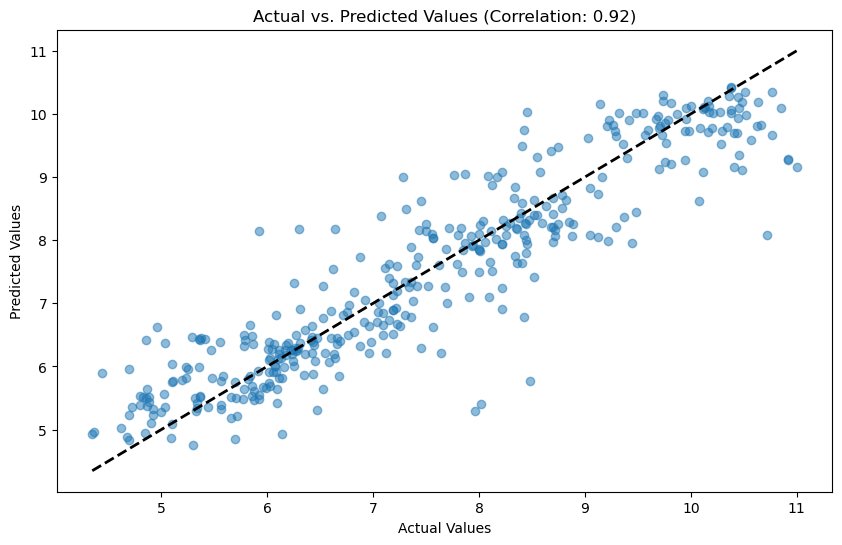

In [48]:
# plot
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 実測値と予測値の取得
actual_values = test_df["pIC50"]
predicted_values = gbm.predict(test_df[desc_names], num_iteration=gbm.best_iteration)

# 相関係数の計算
correlation_coefficient, _ = pearsonr(actual_values, predicted_values)

# プロットの作成
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (Correlation: {correlation_coefficient:.2f})')
plt.show()


### ハイパーパラメーターチューニング

In [146]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# ハイパーパラメータの候補を設定
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# LGBMRegressorモデルのインスタンスを作成
model = lgb.LGBMRegressor()

# グリッドサーチを設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# グリッドサーチを実行
grid_search.fit(train_valid_df[desc_names], train_valid_df["pIC50"])

# 最適なパラメータの表示
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# 最適なパラメータでモデルを再トレーニング
best_model = grid_search.best_estimator_
best_model.fit(train_valid_df[desc_names], train_valid_df["pIC50"])

# 予測
predictions = best_model.predict(test_df[desc_names])

print(predictions)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 1247, number of used features: 175
[LightGBM] [Info] Total Bins 21994
[LightGBM] [Info] Total Bins 21951
[LightGBM] [Info] Total Bi

KeyboardInterrupt: 

## デザイン化合物の予測

In [168]:
# SMILESの入力
import pandas as pd
input = pd.read_csv('./chembl/input.smi', delimiter='  ', header=None, names=['SMILES', 'Name'], engine='python')
input

SMILES         Name
0  CC(C)C1=CC=CC=C1[C@@H]2CCCN2C3CC4(C3)CCN(CC4)C...  sonrotoclax
1  CC(C)C1=CC=CC=C1[C@@H]2CCCN2C3CC4(C3)CCN(CC4)C...         test